In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load dataset
file_path = "C:/Users/unnat/Downloads/Deepseek VS ChatGPT/comparitive_analysis.csv"  
df = pd.read_csv(file_path)

In [12]:
# Define key metrics for comparison
comparison_metrics = [
    "User_Rating", "User_Experience_Score", "Session_Duration_sec",
    "Response_Accuracy", "Response_Speed_sec", "Correction_Needed"
]

In [14]:
# Compute mean values for each AI platform
comparison_summary = df.groupby("AI_Platform")[comparison_metrics].mean()
comparison_summary

,User_Rating,User_Experience_Score,Session_Duration_sec,Response_Accuracy,Response_Speed_sec,Correction_Needed
AI_Platform,,,,,,
ChatGPT,3.998818,1.230971,22.564421,0.802574,3.443296,0.145784
DeepSeek,4.802803,2.034657,34.687246,0.899684,1.236462,0.143379


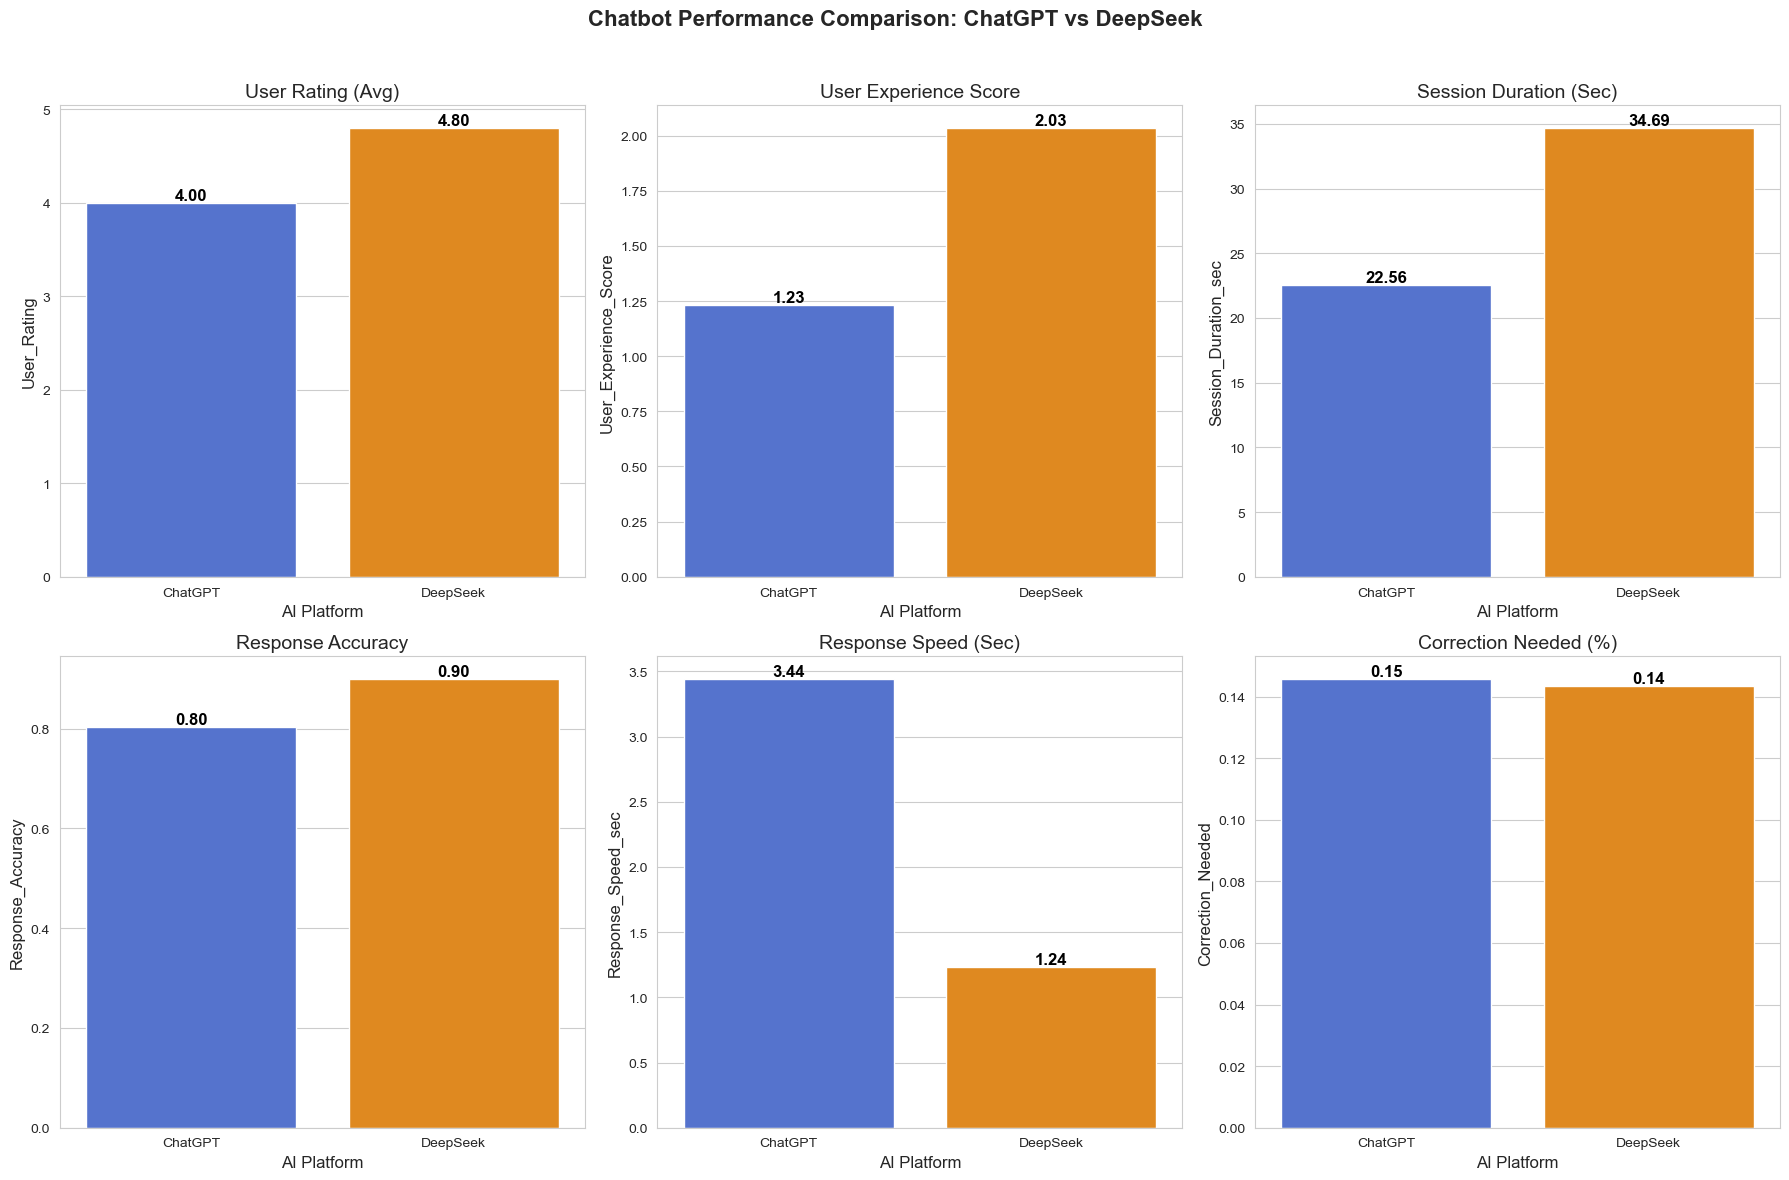

In [16]:
# Set visualization style
sns.set_style("whitegrid")

# Define colors for ChatGPT and DeepSeek
colors = {"ChatGPT": "royalblue", "DeepSeek": "darkorange"}

# Plot bar charts for key metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

metrics = [
    "User_Rating", "User_Experience_Score", "Session_Duration_sec",
    "Response_Accuracy", "Response_Speed_sec", "Correction_Needed"
]

titles = [
    "User Rating (Avg)", "User Experience Score", "Session Duration (Sec)",
    "Response Accuracy", "Response Speed (Sec)", "Correction Needed (%)"
]

# Loop through metrics and plot bar charts
for i, metric in enumerate(metrics):
    row, col = divmod(i, 3)
    
    ax = axes[row, col]
    sns.barplot(
        data=comparison_summary, x="AI_Platform", y=metric, hue="AI_Platform",
        palette=colors, ax=ax, legend=False
    )
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

    ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xlabel("AI Platform", fontsize=12)

plt.suptitle("Chatbot Performance Comparison: ChatGPT vs DeepSeek", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plots
plt.show()

In [18]:
# Check unique device types
print("Unique Device Types:", df["Device_Type"].unique())

# Count number of users per device type for each chatbot
device_counts = df.groupby(["AI_Platform", "Device_Type"]).size().reset_index(name="User_Count")

Unique Device Types: ['Mobile' 'Laptop/Desktop' 'Tablet' 'Smart Speaker']


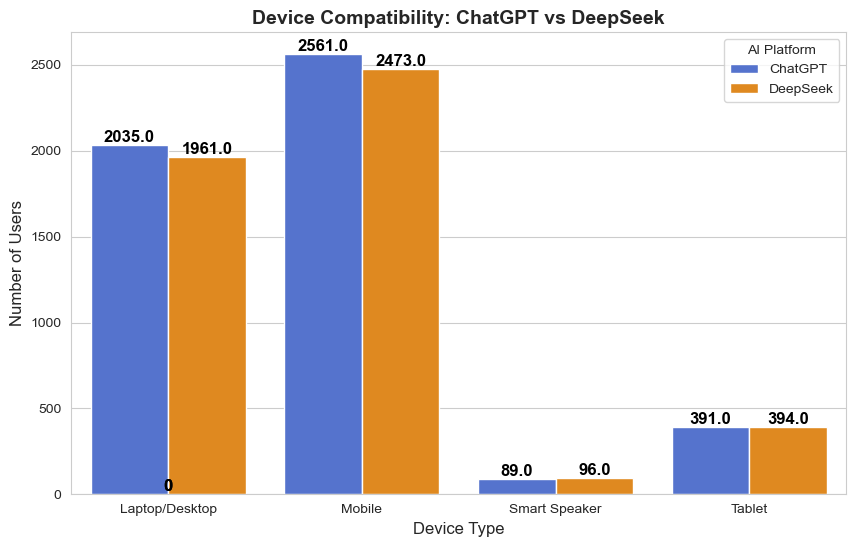

In [20]:
# Set visualization style
sns.set_style("whitegrid")

# Plot bar chart for device compatibility
plt.figure(figsize=(10, 6))
sns.barplot(data=device_counts, x="Device_Type", y="User_Count", hue="AI_Platform", palette={"ChatGPT": "royalblue", "DeepSeek": "darkorange"})

plt.title("Device Compatibility: ChatGPT vs DeepSeek", fontsize=14, fontweight='bold')
plt.xlabel("Device Type", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.legend(title="AI Platform")

# Show values on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

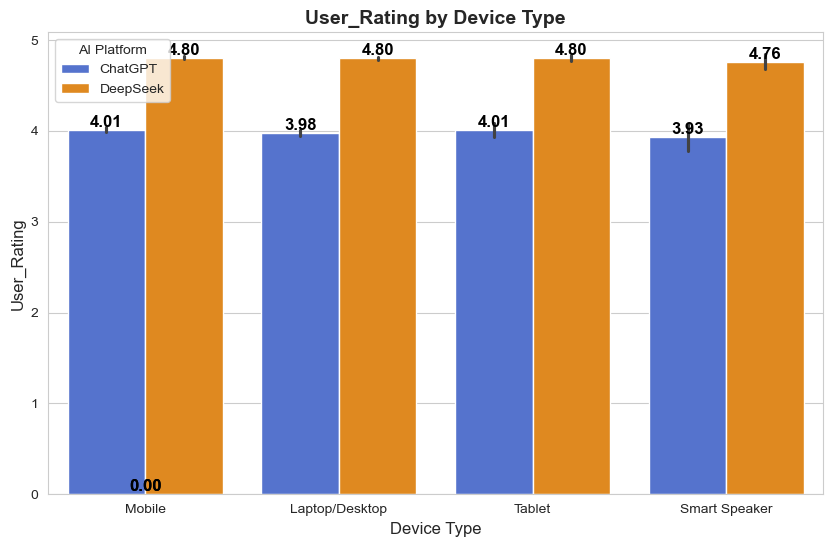

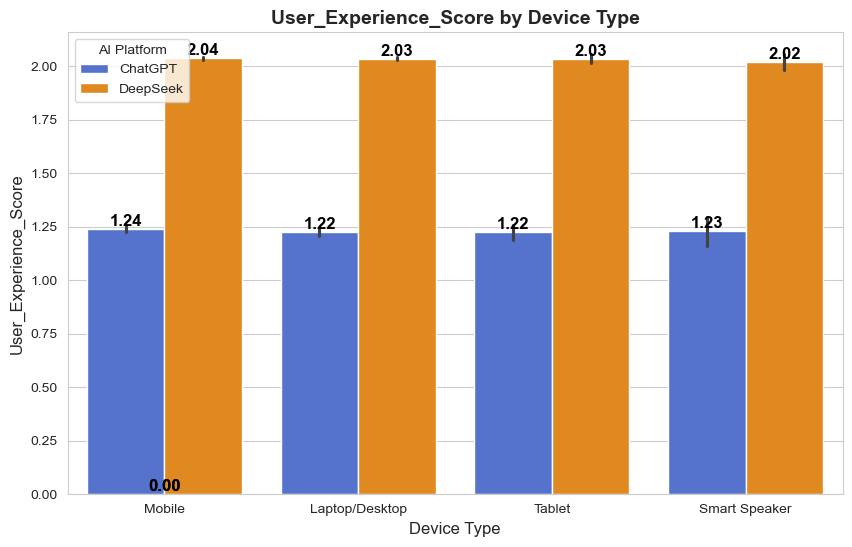

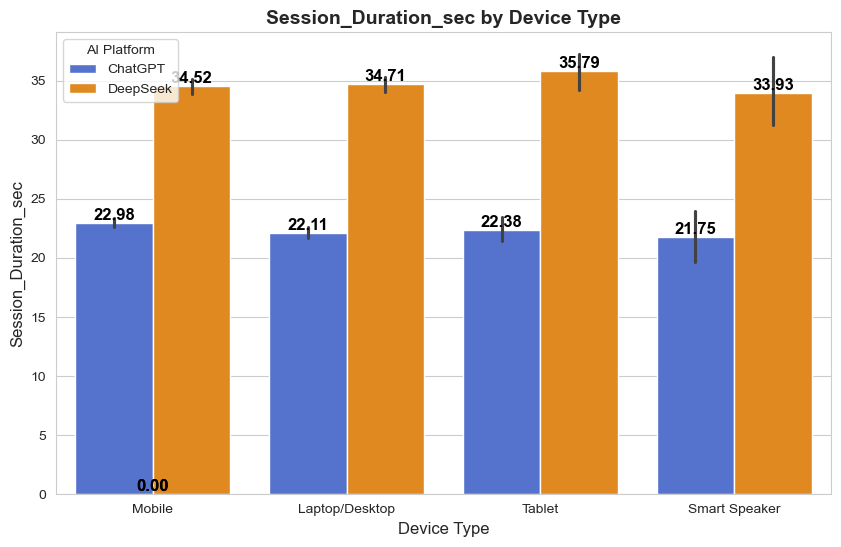

In [22]:
# Compare user experience across devices
experience_metrics = ["User_Rating", "User_Experience_Score", "Session_Duration_sec"]

for metric in experience_metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="Device_Type", y=metric, hue="AI_Platform", palette={"ChatGPT": "royalblue", "DeepSeek": "darkorange"})
    
    plt.title(f"{metric} by Device Type", fontsize=14, fontweight='bold')
    plt.xlabel("Device Type", fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.legend(title="AI Platform")

    # Show values on bars
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.2f}', 
                           (p.get_x() + p.get_width() / 2, p.get_height()), 
                           ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

    plt.show()

In [24]:
# Conduct One-Way ANOVA Test

# H₀ (Null Hypothesis): There is no significant difference in the means of user experience across devices.
# H₁ (Alternative Hypothesis): At least one device type has a significantly different mean experience.

In [28]:
import scipy.stats as stats

# Ensure relevant columns exist
metrics = ["User_Rating", "User_Experience_Score", "Session_Duration_sec"]
if "Device_Type" not in df.columns or not all(metric in df.columns for metric in metrics):
    print("Error: Required columns missing in dataset.")
else:
    # Perform ANOVA for each metric
    for metric in metrics:
        print(f"\n🔹 ANOVA Test for {metric} Across Devices:")

        # Create groups based on Device_Type
        groups = [df[df["Device_Type"] == device][metric].dropna() for device in df["Device_Type"].unique()]

        # Conduct ANOVA test
        f_stat, p_value = stats.f_oneway(*groups)

        # Display results
        print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.5f}")

        if p_value < 0.05:
            print("✅ Significant difference found between devices.")
        else:
            print("❌ No significant difference found.")


🔹 ANOVA Test for User_Rating Across Devices:
F-statistic: 0.591, p-value: 0.62083
❌ No significant difference found.

🔹 ANOVA Test for User_Experience_Score Across Devices:
F-statistic: 0.304, p-value: 0.82243
❌ No significant difference found.

🔹 ANOVA Test for Session_Duration_sec Across Devices:
F-statistic: 0.993, p-value: 0.39512
❌ No significant difference found.
